In [2]:
from pandas import read_csv

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='white')

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [3]:
data = read_csv(r'Aws_store_cleaned_data.csv', parse_dates = ['CartViewed',
                                    'CheckoutStarted', 'OrderCompleted', 
                                    'ProductAdded', 'ProductViewed'])
data.head(2)

,item_id,user_id,discount,CartViewed,CheckoutStarted,OrderCompleted,ProductAdded,ProductViewed,product_name,category,...,age,gender,address1,country,city,state_x,zipcode,zcta,state_y,status
0,00096972-5f6b-44df-917b-f7d21ae5644c,229,Yes,NaT,NaT,NaT,NaT,2020-06-18 19:54:27,Pink Shirt,apparel,...,52,F,1620 Kaitlin Drive Apt. 106,US,New Alicia,MA,1287,NaN,NaN,upper
1,00096972-5f6b-44df-917b-f7d21ae5644c,417,No,NaT,NaT,NaT,NaT,2020-06-17 00:49:00,Pink Shirt,apparel,...,28,F,224 Huber Plains Apt. 687,US,Meganfort,WI,53601,NaN,NaN,middle


In [4]:
buyers = data[data['OrderCompleted'].notna()].copy()

#### **Buyers**
##### Gender and Age

Text(0.5, 0, 'Age')

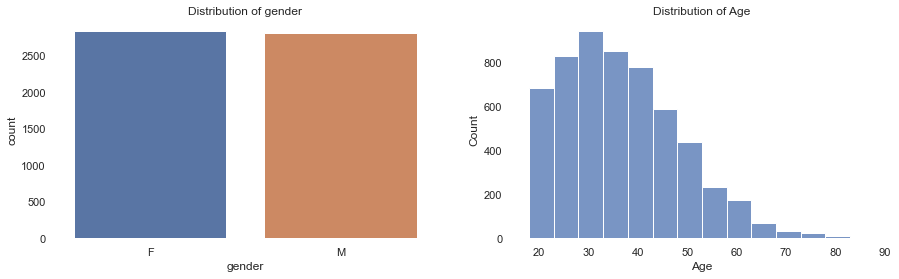

In [5]:
#Gender and Age distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 4), facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
sns.countplot(x='gender', data= buyers)
plt.title('Distribution of gender')
sns.despine(bottom = True, left = True)

plt.subplot(1,2,2)
sns.histplot(buyers, x='age', binwidth= 5)
plt.title('Distribution of Age')
plt.xlabel('Age')

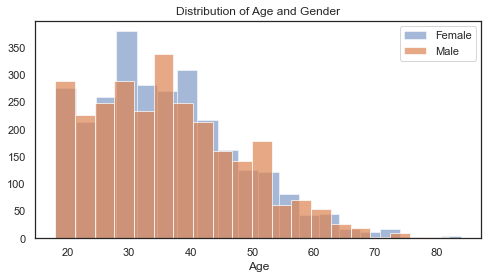

In [6]:
plt.figure(figsize=(8,4))
plt.hist(data =buyers[buyers['gender'] == 'F'], x='age', alpha= 0.5, label='Female', bins=20)
plt.hist(data =buyers[buyers['gender'] == 'M'], x='age', alpha= 0.7, label='Male', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age and Gender')
plt.legend()


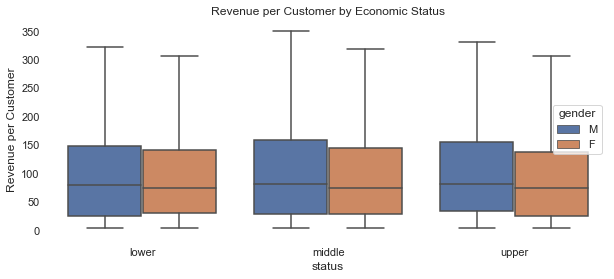

In [7]:
buyers_gpd = buyers.groupby(['user_id', 'gender', 'status', 'category'], as_index= False).price.sum()

plt.figure(figsize=(10,4))
sns.boxplot(x='status', y= 'price', hue="gender",
            data= buyers_gpd, showfliers= False, order=['lower', 'middle', 'upper'])
plt.ylabel('Revenue per Customer')
plt.title('Revenue per Customer by Economic Status')
sns.despine(bottom = True, left = True)

Male customers generate lower revenue in all economic groups.

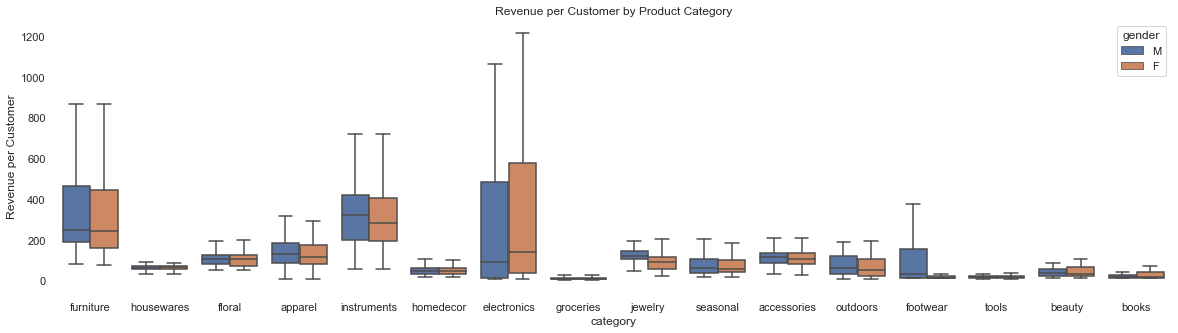

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(x='category', y= 'price', hue="gender",
            data= buyers_gpd, showfliers= False)
plt.ylabel('Revenue per Customer')
plt.title('Revenue per Customer by Product Category')
sns.despine(bottom = True, left = True)

In [9]:
buyers.rename(columns={'state_x': 'state'}, inplace = True)

In [10]:
buyers.columns

Index(['item_id', 'user_id', 'discount', 'CartViewed', 'CheckoutStarted',
       'OrderCompleted', 'ProductAdded', 'ProductViewed', 'product_name',
       'category', 'style', 'price', 'current_stock', 'username', 'email',
       'first_name', 'last_name', 'age', 'gender', 'address1', 'country',
       'city', 'state', 'zipcode', 'zcta', 'state_y', 'status'],
      dtype='object')

##### **K-Prototype Clustering**

In [11]:
buyers['total revenue'] = buyers.groupby('user_id').price.transform('sum')
df = buyers[['discount', 'age', 'gender', 'category',  'state', 
             'status', 'total revenue']].copy()

In [12]:
df

,discount,age,gender,category,state,status,total revenue
18,Yes,53,F,apparel,ID,middle,243.98
59,No,28,M,groceries,AL,lower,165.97
65,No,40,M,groceries,AL,middle,122.98
68,No,20,F,groceries,AR,upper,24.99
186,Yes,30,M,apparel,UT,lower,194.98
...,...,...,...,...,...,...,...
115998,No,32,F,floral,AR,middle,186.98
116002,No,21,M,floral,NM,middle,129.99
116061,No,21,F,footwear,NM,lower,948.96
116062,Yes,21,F,footwear,NM,lower,948.96


In [13]:
cat_cols_pos = [df.columns.get_loc(col) for col in 
            list(df.select_dtypes('object').columns )]

df_matrix = df.to_numpy()
df_matrix

array([['Yes', 53, 'F', ..., 'ID', 'middle', 243.98000000000002],
       ['No', 28, 'M', ..., 'AL', 'lower', 165.97],
       ['No', 40, 'M', ..., 'AL', 'middle', 122.97999999999999],
       ...,
       ['No', 21, 'F', ..., 'NM', 'lower', 948.96],
       ['Yes', 21, 'F', ..., 'NM', 'lower', 948.96],
       ['No', 41, 'F', ..., 'MA', 'upper', 9.99]], dtype=object)

In [19]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = 1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df_matrix, categorical = cat_cols_pos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
    #https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

In [20]:
cost

[]